execute: 20170430

## import

In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, GlobalAvgPool2D
from keras.layers.core import Activation
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,\
load_img,random_rotation, random_shift, random_shear, random_zoom, flip_axis, random_channel_shift
import matplotlib.pyplot as plt

import pickle

Using TensorFlow backend.


## path setting

In [2]:
import sys, os
wk_dir = os.path.dirname(os.path.realpath('__file__')) #ipython用
sys.path.append(wk_dir)

In [3]:
img_width, img_height = 270, 360

train_data_dir = './../data/train/'
validation_data_dir = './../data/validation/'

## data generate

In [4]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 5931 images belonging to 9 classes.
Found 2970 images belonging to 9 classes.


In [5]:
train_samples = 5931
validation_samples = 2970

## convolution model 

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height,3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(9, (1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(GlobalAvgPool2D())
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 268, 358, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 268, 358, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 268, 358, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 134, 179, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 132, 177, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 132, 177, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 132, 177, 32)      0         
__________

## Execute Train

In [32]:
epochs = 60

In [ ]:
csv_logger = CSVLogger('csvlogger.csv')

model_hist = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples// batch_size,
    callbacks=[csv_logger]
)

model.save('FontKaruta_epoch60.hdf5')

checkpoint_dir = os.path.join(os.path.dirname(wk_dir),'checkpoint')
pickle_hist = os.path.join(checkpoint_dir,'pickle_hist_epoch60.pkl')

with open(pickle_hist,'wb') as f:
    pickle.dump(model_hist.history, f)

Epoch 1/60
185/185 [==============================] - 79s - loss: 0.0351 - acc: 0.9951 - val_loss: 1.2124 - val_acc: 0.6195

## Plot

In [16]:
def plot_history(history,title):
    # 精度の履歴をプロット
    plt.plot(history['acc'], marker='.')
    plt.plot(history['val_acc'], '--.')
    plt.plot(history['loss'], marker='.')
    plt.plot(history['val_loss'], '--.')
    
    plt.xlabel('epoch')
    plt.grid()
    plt.legend(['acc', 'val_acc','loss','val_loss'], loc='best')    
    plt.title(title)
    #plt.show() #subplotで整形して表示したい場合は plt.showしてはいけない

In [28]:
with open('./../checkpoint/pickle_hist.pkl','rb') as f:
    load_pickle_hist = pickle.load(f)

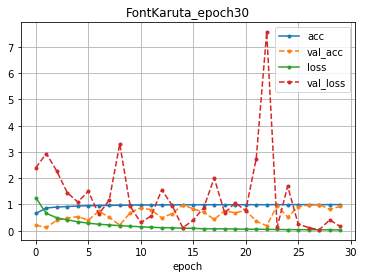

In [30]:
plot_history(load_pickle_hist,'FontKaruta_epoch30')

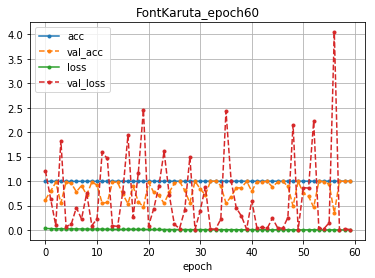

In [34]:
with open('./../checkpoint/pickle_hist_epoch60.pkl','rb') as f:
    load_pickle_hist = pickle.load(f)
    
plot_history(load_pickle_hist,'FontKaruta_epoch60')